# Part I - Ford GoBike System Data Analysis
## by Pius Uagbae Ejodamen

## Introduction

The Ford GoBike System data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset for this study (named '201902-fordgobike-tripdata') may be made available on request. 

There 183412 records and 16 features in the dataset. Participants in the ride sharing were either Subscribers or customers and were aged from 18 and above. No underage rode the bikes! The bikes were available for riding at various times - from morning to night!

## Preliminary Wrangling

First, we upload the dataset. Then the dataset is visually and programmatically examined for quality and tidiness issues. All identified issued are subsequently cleaned before analysing the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load dataset
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Examine the structure of the dataset; number of records and attributes
df_bike.shape

(183412, 16)

In [4]:
# Examine the nature of the dataset
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# View the first five data
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# Examine the descriptive statistics of the dataset
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# What is the structural format of the data?
df_bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### What is the structure of your dataset?

> Ford GoBike System data set contains 183412 records of a bike-sharing system detailing individual rides in San Francisco.
> The longest duration of bike ride was 85444seconds, where the average ride took about 726seconds and the least ride duration was 61seconds.
> There are 16 features in this dataset with varying datatypes. While some features are properly structured, some others have wrong datatypes. For example, start_time and end_time should be dates and not objects/strings. These tidiness issues would need to be cleaned before any further analysis.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest are the effect of a rider's age on the duration. I presume that younger riders can ride-on much longer than older counterparts.
> Also, it will be interesting to know if females will ride longer than males. In cases where gender is not clearly stated, it could be assumed that they are transgender. If so, do transgender ride better than straight individuals?
> Furthermore, users are categorized as either subscribers or customers. Data can reveal if subscribers enjoy more privileges with respect to duration of ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that could help my investigation are duration_sec, member_gender, member_birth_year, and user_type.

### Quality and Tidyness issues
- start_time and end_time should be converted to datetime datatype
- convert start_station_id, end_station_id, bike_id datatype to string
- There are empty (NaN) entries in some attributes. This should be looked into.
- Create new columns - hour, day - extracted from the 'start_time' date column
- Birth year alone donot state the age. Create another column to contain the ages of each rider.

#### Issue 1:

##### Define:
start_time and end_time should be converted to datetime datatype

##### Code:

In [8]:
''' Convert dates from string/object datatype to datetime'''
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

##### Test:

In [9]:
df_bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Issue 2:

##### Define:

Convert start_station_id, end_station_id, bike_id datatype to string. This is necessary so that the program does not treat the IDs as interger values, especially during visualizations.

##### Code:

In [10]:
df_bike['start_station_id'] = df_bike['start_station_id'].astype(str)
df_bike['end_station_id'] = df_bike['end_station_id'].astype(str)
df_bike['bike_id'] = df_bike['bike_id'].astype(str)

##### Test:

In [11]:
df_bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Issue 3:

##### Define:
There are empty (NaN) entries in some attributes. This should be looked into.

The intent of this study is to examine every relevant segment. Hence, instead of deleting empty entries, we replace it with "unspecified". This will help us understand the impact of the omitted entries.

##### Code:


In [12]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [13]:
# Replace all empty cells with "Unspecified"
df_bike['member_gender'].fillna("Unspecified", inplace=True)

##### Test:

In [14]:
# What are the numbers for each gender category?
df_bike['member_gender'].value_counts()

Male           130651
Female          40844
Unspecified      8265
Other            3652
Name: member_gender, dtype: int64

#### Issue 4:

##### Define:
Create new columns - hour, day - extracted from the 'start_time' dates

##### Code:

In [15]:
from datetime import datetime as dt

In [16]:
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_hour'] = df_bike['start_time'].dt.hour

In [17]:
def get_hour_name(hr):
    ''' This function takes a day's hour value as input 
        and returns an equivalent linguistic value. 
        Notably, hours of 4am and 12noon is Morning,
        hours between 12noon and 4pm is Afternoon, 
        between 4pm to 9pm is evening.'''
    
    if hr >=4 and hr<12:
        ret = 'Morning'
    elif hr>=12 and hr<16:
        ret = 'Afternoon'
    elif hr>=16 and hr<21:
        ret = 'Evening'
    else:
        ret = 'Night'
    return ret

In [18]:
#Create a column to store the time the ride started (Morning, Afternoon, Evening, or Night) from 'start_hour'
df_bike['start_hour_name'] = df_bike['start_hour'].apply(lambda x: get_hour_name(x))

##### Test:

In [19]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,start_hour_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,Unspecified,No,Thursday,18,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,Night


##### Issue 5:

#### Define:
Birth year alone donot state the age. Create another column to contain the ages of each rider.

#### Code:

In [20]:
#Create a column to store the age, computed from 'member_birth_year'
df_bike['member_age'] = df_bike['member_birth_year'].apply(lambda x: 2019 - x)

In [21]:
#Check the minimum age
df_bike['member_age'].min()

18.0

In [22]:
# Check if there are empty entries. Results shows 8265 'member_birth_year' was not specified.
# This number is significant to ignore.
df_bike['member_age'].isnull().sum()

8265

In [23]:
# Enter zero (0) for all empty cells
df_bike['member_age'].fillna(0, inplace=True)

#### Test:

In [24]:
# Check again if there are empty entries. 
df_bike['member_age'].isnull().sum()

0

In [25]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,start_hour_name,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,Evening,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,Unspecified,No,Thursday,18,Evening,0.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,Afternoon,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,Evening,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,Night,45.0


### Relevant Attributes Creation

Visual assessment reveals that the youngest rider was 18years and the oldest was 141 years. Also, some year of birth were not specified, hence age could not be calculated. To avoid null cells, we classify any age below the minimum age in the dataset (18years) as 'Unspecified'. 

The age groups are therefore categorised as Unspecified (<18), Youth (18- 25), Adult(26 - 59), Elder(>59)

In [26]:
# Examine the statistics of the re-structured dataset
df_bike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_hour,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,13.458421,32.652716
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,4.724978,12.167516
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,0.000000,0.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,9.000000,26.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,14.000000,31.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,17.000000,38.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,23.000000,141.000000


In [27]:
# Investigate the rider whose age, 141, seem like an outlier
df_bike[df_bike['member_age']==141]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,start_hour_name,member_age
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No,Monday,9,Morning,141.0


We may want to consider 141years too old to be able to ride. This customer rode for 24.57mins (1474secs/60). For this analysis, 141years is considered an outlier and that record will be deleted. Has any human in year 2019 been confirmed to have attained 141years?

In [28]:
#Obtain the index of the record with 141years and delete it.
ind = df_bike[df_bike['member_age']==141].index
df_bike.drop(index = ind, axis = 0, inplace = True)

In [29]:
# Confirm the change has taken effect. 119years is possible and is sustained.
df_bike['member_age'].max()

119.0

In [30]:
#Categorize age groups 
group = [0, 17, 25, 59, 142]
labels = ['Unspecified', 'Youth', 'Adult', 'Elder']
df_bike['member_age_group'] = pd.cut(df_bike['member_age'], bins = group, labels = labels, include_lowest=True)

In [31]:
df_bike['member_age_group'].value_counts()

Adult          140341
Youth           30652
Unspecified      8265
Elder            4153
Name: member_age_group, dtype: int64

In [32]:
df_bike['member_age_group'].head(5)

0          Adult
1    Unspecified
2          Adult
3          Adult
4          Adult
Name: member_age_group, dtype: category
Categories (4, object): ['Unspecified' < 'Youth' < 'Adult' < 'Elder']

In [33]:
# Save the restructured and cleaned data to file
df_bike.to_csv('201902-fordgobike-tripdata_cleaned.csv')

## Univariate Exploration

 

#### Research Question 1:

What gender was most involved in riding?

In [34]:
df_bike['member_gender'].unique()

array(['Male', 'Unspecified', 'Other', 'Female'], dtype=object)

In [35]:
df_bike['member_gender'].value_counts()

Male           130651
Female          40843
Unspecified      8265
Other            3652
Name: member_gender, dtype: int64

In [62]:
# Function to visualize data using seaborn countplot and pointplot
def count_point_plot (ptype, hor, hor_label=None, vert_label=None, title=None,  vert=None, zhue=None, sort=[], color_val=0):
    plt.figure(figsize=(15,6))
       
    if ptype == 'count' and zhue == None:
        sb.countplot(data=df_bike, x = hor, order=sort, color=sb.color_palette()[color_val])     
    elif ptype == 'count' and zhue != None:
        sb.countplot(data=df_bike, x = hor, hue= zhue, order=sort)     
    else:
        sb.pointplot(data=df_bike, x = hor, y = vert, hue = zhue, order=sort, ci=None)  

    plt.title(title)
    plt.ylabel(vert_label)
    plt.xlabel(hor_label)

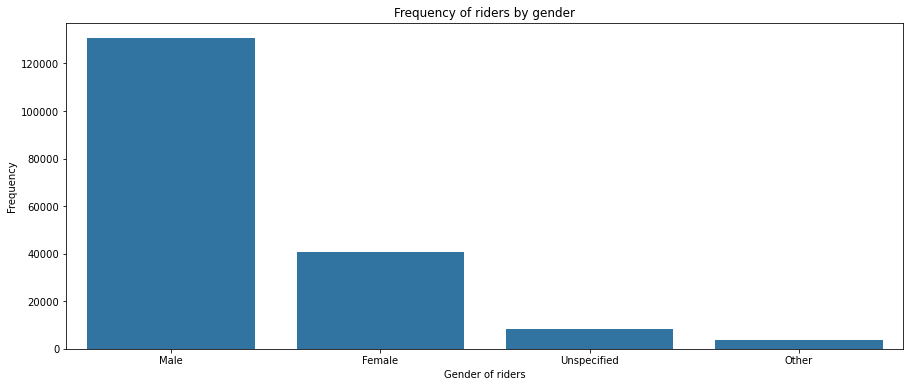

In [37]:
count_point_plot(ptype = 'count', hor = 'member_gender', 
                 sort=df_bike['member_gender'].value_counts().index,
                 hor_label ='Gender of riders', vert_label ='Frequency', title='Frequency of riders by gender')

#### Observations on Research Question 1:

The bar chart of rider's gender indicates that males overwhelms other genders, followed by the females. Notably, those who did not specify their genders are quite more than those who stated "Other".

Conclusively, the Male gender was most involved in riding.

#### Research Question 2:

What riders' category was least involved?

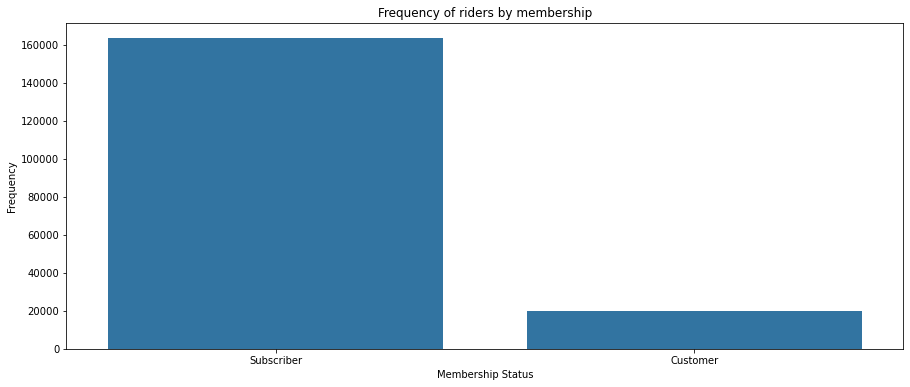

In [38]:
count_point_plot(ptype = 'count', hor = 'user_type', 
                 sort=df_bike['user_type'].value_counts().index,
                 hor_label ='Membership Status', vert_label ='Frequency', title='Frequency of riders by membership')

In [39]:
#Get the frequency of rides for each membership category
user_count = df_bike['user_type'].value_counts()
user_count

Subscriber    163544
Customer       19867
Name: user_type, dtype: int64

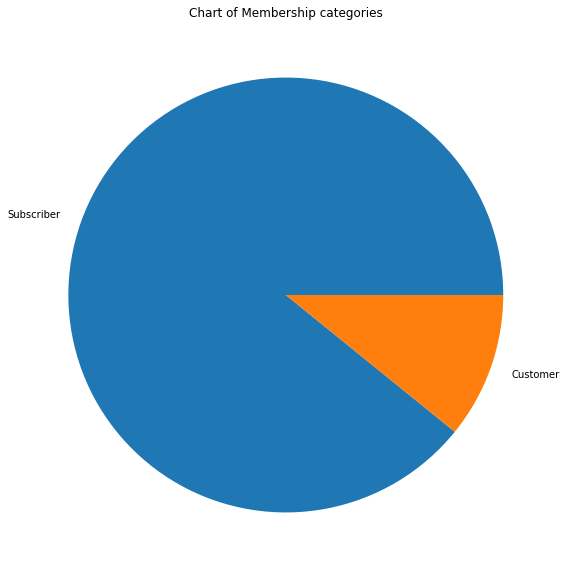

In [40]:
plt.figure(figsize=(10,10))
plt.pie(data=df_bike, x= user_count, labels = user_count.index);
plt.title('Chart of Membership categories');

#### Observations on Research Question 2:

There are two riders' categories; namely Subscribers and Customers. The 'Customer' category of riders were least involved in sharing bike rides. 

The chart shows that most riders are subscribers when compared with normal customers. The reason for this major bias may be that subscribers are given preferential treatments when allocating bikes, so more subscribers have access to bikes. The customer category may have access based on availability.

#### Research Question 3:
What time of day is preferable for riding?

In [41]:
df_bike['start_hour_name'].value_counts()

Evening      69223
Morning      68436
Afternoon    34601
Night        11151
Name: start_hour_name, dtype: int64

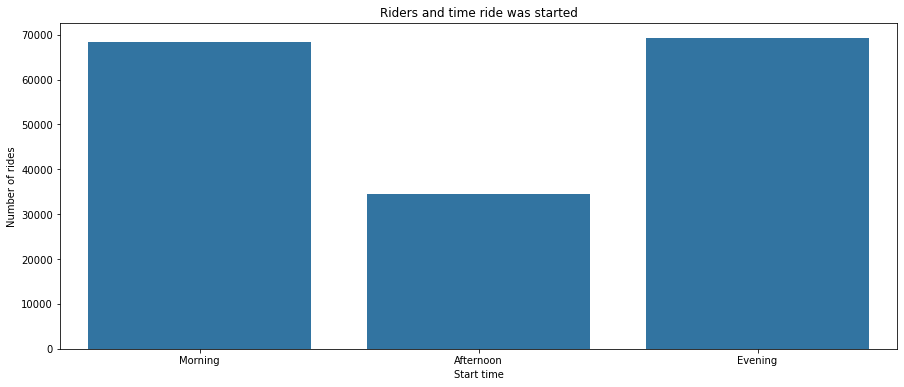

In [42]:
# Visualize the time of day that riders commence their trip
count_point_plot(ptype = 'count', hor = 'start_hour_name', 
                 sort=['Morning', 'Afternoon', 'Evening'],
                 hor_label ='Start time', vert_label ='Number of rides', title='Riders and time ride was started')

#### Observations on Research Question 3:

This chart illustrates the time of day riders prefered to commence riding. It can be seen that most riders prefer mornings and evenings to start riding. This could be due to less intensity of the Sun. It could also be that most people are riding to work in the morning and returning in the evening. However, some still prefer afternoon to start riding.

#### Research Question 4:
Do aged people ride?

In [43]:
# Get the numbers of each age group
age_group = df_bike['member_age_group'].value_counts()
age_group

Adult          140341
Youth           30652
Unspecified      8265
Elder            4153
Name: member_age_group, dtype: int64

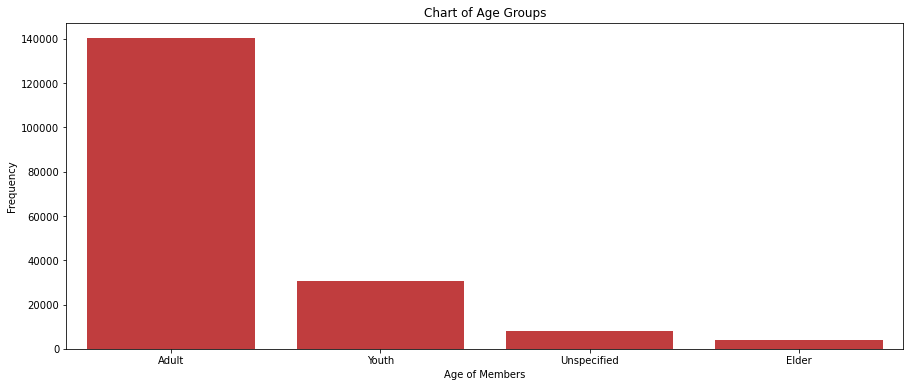

In [44]:
# Visualize the frequency of age groups
count_point_plot(ptype = 'count', hor = 'member_age_group', 
                 sort=df_bike['member_age_group'].value_counts().index, color_val= 3,
                 hor_label ='Age of Members', vert_label ='Frequency', title='Chart of Age Groups')

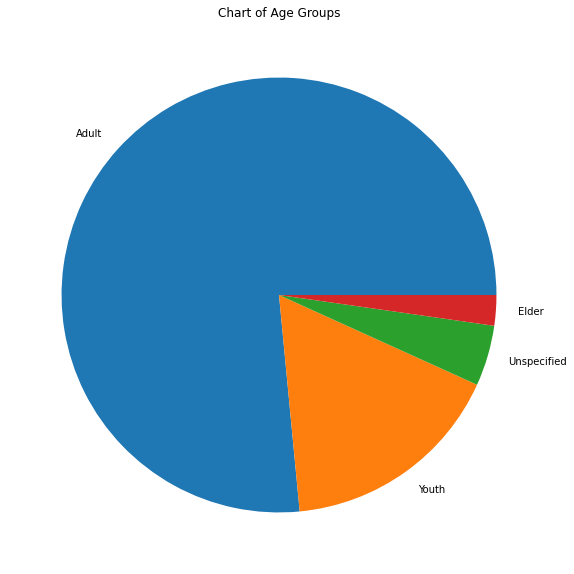

In [45]:
plt.figure(figsize=(10,10))
plt.pie(data=df_bike, x= age_group, labels = age_group.index);
plt.title('Chart of Age Groups');

#### Observations on Research Question 4:

The aged are elderly individuals of 60years and above. Data shows that aged people also ride! Although, Elders are the least in number among riders, there are some individuals who did not declare their date of birth ("unspecified"). 

Generally, adults between 26 and 59years are the most active riders!

#### Research Question 5:

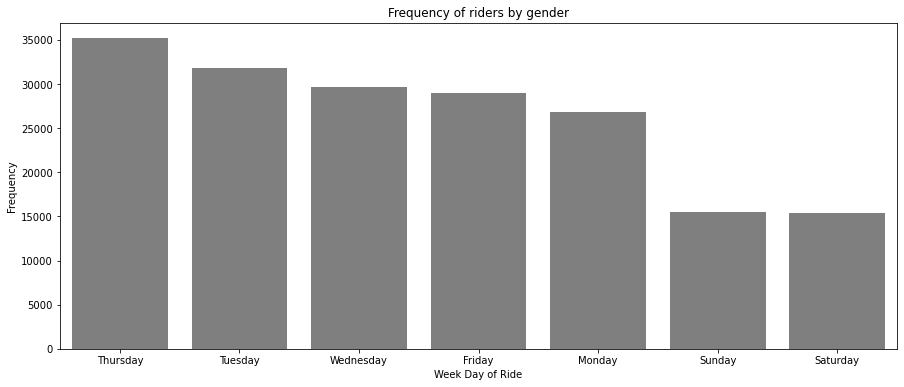

In [46]:
# Plot a bar chart of the day of the week that bikes were rode.    
count_point_plot(ptype = 'count', hor = 'start_day', 
             sort=df_bike['start_day'].value_counts().index, color_val= 7,
             hor_label ='Week Day of Ride', vert_label ='Frequency', title='Frequency of riders by gender')

There were more rides on Thursdays, followed by Tuesdays, Wednesday, Friday, and Monday. Notably, weekends - Sunday and Saturdays - experienced the least rides.

In [47]:
df_bike['start_day'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26851
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64

#### Observations on Research Question 5:
It can be noticed that mostly Adults (between 26 - 59years) were involved in the rides. Young people between 18 and 25 years were more involved than others who did not specify their ages. A handful of Elders(above 59years) also participated.

Wherever the member's date of birth was not specified, zero (0) was entered as the age, noting that the least age in the dataset was 18. Subsequently, any age below 18 (including 0) was classified as 'Unspecified'. Other age groups were categorized as Youth (18- 25), Adult(26 - 59), and Elder(>59).

#### Research Question 6:
Is there time limitations to getting a bike?        

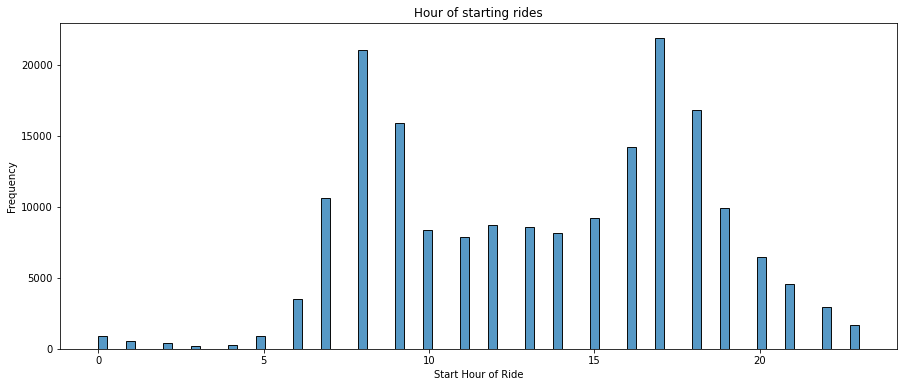

In [48]:
plt.figure(figsize=(15,6))
sb.histplot(data = df_bike, x = 'start_hour');
plt.ylabel('Frequency')
plt.xlabel('Start Hour of Ride')
plt.title('Hour of starting rides');

#### Observations on Research Question 6:
The plot shows that riders were not limited by time. Although few, some riders started as early as 5am or earlier. Most rides started around 8am and a surge is noticed around 5pm.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable examined was adequate. However, there was need to create new columns 
> An outlier was discovered in the member_birth, which was removed to have a cleaner dataset for analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some of the data had either quality issues or tidyness issues. The include: 
> - start_time and end_time should be converted to datetime datatype
> - convert start_station_id, end_station_id, bike_id datatype to string
> - There are empty (NaN) entries in some attributes. This should be looked into.
> - Create new columns - hour, day - extracted from the 'start_time' date column
> - Birth year alone donot state the age. Create another column to contain the ages of each rider.

> It was important to clean the data so as to be able analyse them correctly.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in our
data.

#### Research Question 7:
Which membership category members have more time riding.

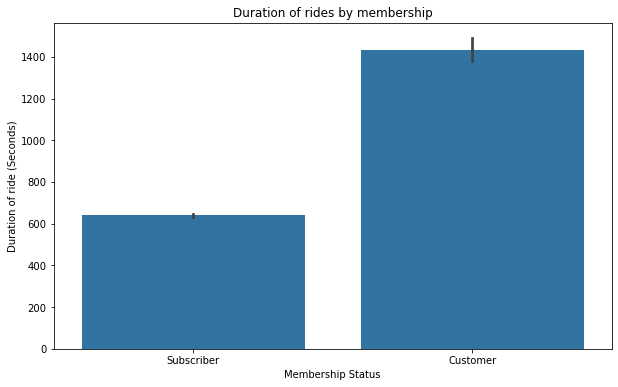

In [49]:
# Visualize the duration of ride for tje membership cases.
plt.figure(figsize=(10,6))
sb.barplot(data=df_bike, x = 'user_type', y = 'duration_sec', order=df_bike['user_type'].value_counts().index, color=sb.color_palette()[0])  
plt.ylabel('Duration of ride (Seconds)')
plt.xlabel('Membership Status')
plt.title('Duration of rides by membership');

#### Observations on Research Question 7:
The chart shows that riders in the 'Customer' category, had more ride duration. It should be recalled that in research question 2, it was observed that there were more frequency of riders in the 'Subscriber' category who accessed the system.

This could be interpreted that, while there are more subscribers embarking on rides, they spend less time riding. On the other hands, the customers who gain access to the bike, tend to ride much longer that their subscriber counterparts.

#### Research Question 8:
Is there a relationship between age and duration of ride?

In [50]:
users = df_bike['user_type'].value_counts()
users

Subscriber    163544
Customer       19867
Name: user_type, dtype: int64

In [51]:
df_age = df_bike[['member_age', 'duration_sec']]
df_age

,member_age,duration_sec
0,35.0,52185
1,0.0,42521
2,47.0,61854
3,30.0,36490
4,45.0,1585
...,...,...
183407,23.0,480
183408,35.0,313
183409,29.0,141
183410,31.0,139


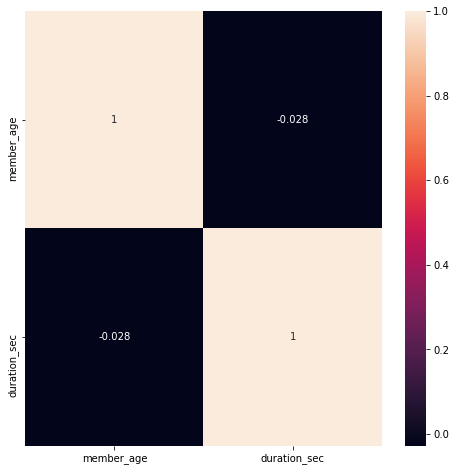

In [52]:
# Visualize the relationship between age and duration of ride
plt.figure(figsize=(8,8))
sb.heatmap(df_age.corr(), annot=True);

#### Observations on Research Question 8:
There is weak negative correlation between the age and duration of ride.

#### Research Question 9:
What day of the week would a 45year old ride most?

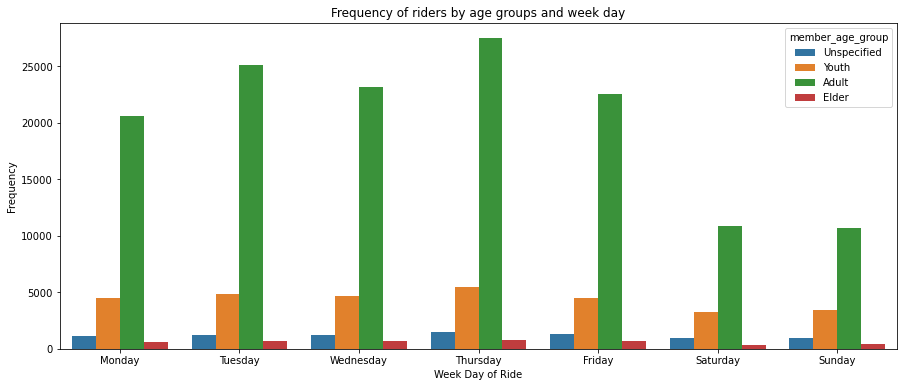

In [53]:
# Plot a bar chart of the day of the week that bikes were rode.    
count_point_plot(ptype = 'count', hor = 'start_day', zhue= 'member_age_group',
             sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
             hor_label ='Week Day of Ride', vert_label ='Frequency', title='Frequency of riders by age groups and week day')


#### Observations on Research Question 9:

The chart shows how riders of different age groups participated. Comparatively, there are lesser riders on Saturdays and Sundays. Probably, this may be due to lesser people riding to work and weekends are used for fun rides.

A 45year old is considered an Adult and from the chart, he will likely prefer Thursday to ride.

An adult of 45years rides most on Thursday.

#### Research Question 10:
What age group rides fastest?

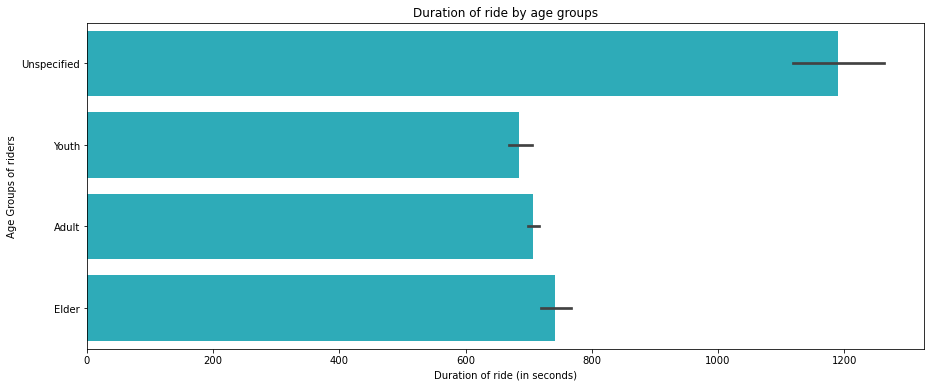

In [54]:
plt.figure(figsize=(15,6))
sb.barplot(data=df_bike, x = 'duration_sec', y= 'member_age_group', color=sb.color_palette()[9]) 
plt.ylabel('Age Groups of riders')
plt.xlabel('Duration of ride (in seconds)')
plt.title('Duration of ride by age groups');

#### Observations on Research Question 10:
The chart of time spent in a ride by the various age groups indicates the importance of the unspecified age categories. Probably, those in that category may be dispersed across other categories by summed up as "unspecified" since the date of birth is unknown.

Expectedly, the Elders spent more time riding than other known age groups. 

It should be noted that the Youth were fastest covering their route.

#### Research Question 11:
What age group takes more time to arrive their destination.

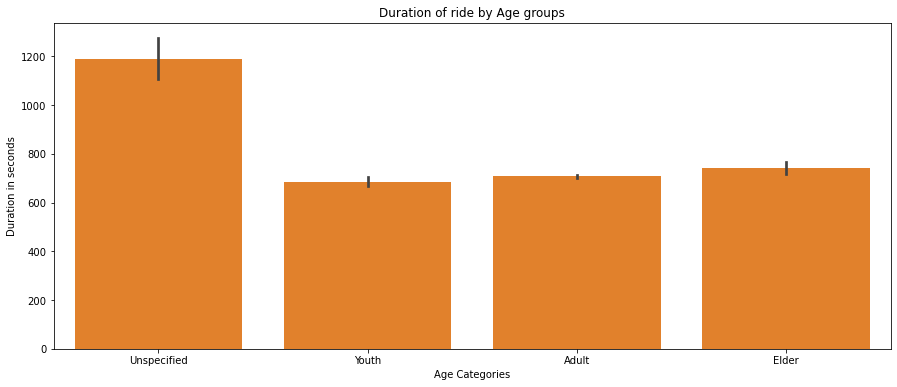

In [55]:
plt.figure(figsize=(15,6))
sb.barplot(data=df_bike, y = 'duration_sec', x= 'member_age_group', color=sb.color_palette()[1]) 
plt.ylabel('Duration in seconds')
plt.xlabel('Age Categories')
plt.title('Duration of ride by Age groups');

#### Observations on Research Question 11:
Among the known age groups, the Elder age group take a little more time during riding to arrive at their destination. However, there is a group of individuals that did not specify their dates of birth. This category, if considered, spends far more time than others.

#### Research Question 12:
Which age group is likely to make bikes more available to others?


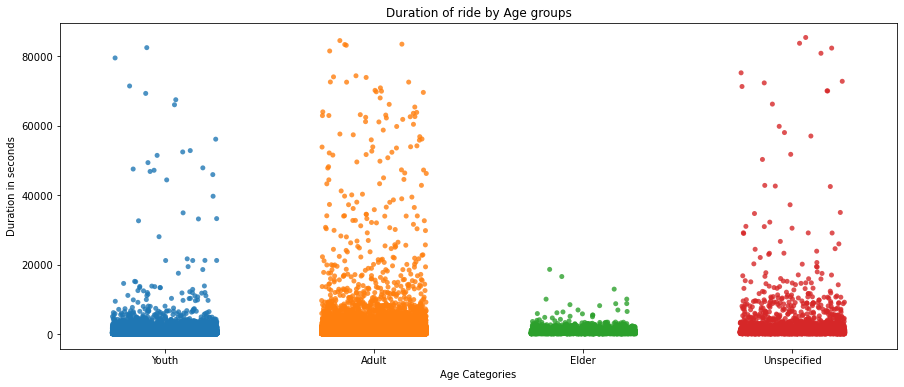

In [56]:
# Draw a scatter plot of age group and ride duration
plt.figure(figsize=(15,6))
sb.stripplot(data=df_bike, y='duration_sec', x='member_age_group', jitter=0.25, alpha=0.8, order = ['Youth', 'Adult', 'Elder', 'Unspecified']);
plt.ylabel('Duration in seconds')
plt.xlabel('Age Categories')
plt.title('Duration of ride by Age groups');

#### Observations on Research Question 12:
Bikes will be more available for others, if those who collect bikes return them. The chart shows that riders in the Elder age group spend lesser time riding and hence return them so others can collect.

In addition, its obvious that the Adults spend most time riding.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The charts show that riders in the 'Customer' category, had more ride duration than those in 'Subscriber' category. This could be interpreted that, while there are more subscribers embarking on rides, they spend less time riding. On the other hand, the customers who gain access to the bike, tend to ride much longer that their subscriber counterparts.

> Comparatively, there are lesser riders on Saturdays and Sundays. Probably, this may be due to lesser people riding to work and weekends are used for fun rides.

> Bikes will be more available for others, if those who collect bikes return them. Among the known age groups, riders in the Elder age group spend lesser time riding and hence return them so others can collect.  Also, they take a little more time during riding to arrive at their destination. Whereas, the Youth were fastest covering their route!

> Data indicates that an Adult will likely prefer Thursday to ride.

> There is a group of individuals that did not specify their dates of birth. This category, if considered, spends far more time riding than others.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The 'start_hour' column was not initially of interest. However, it turned out that we could obtain insights in the time riders prefered to use the bikes.

## Multivariate Exploration


In [57]:
# View sample data for the updated dataset
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,start_hour_name,member_age,member_age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,17,Evening,35.0,Adult
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,Unspecified,No,Thursday,18,Evening,0.0,Unspecified
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,12,Afternoon,47.0,Adult
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,17,Evening,30.0,Adult
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,23,Night,45.0,Adult


#### Research Question 13:
What are the relationships between the time each age group started riding and the time spent?

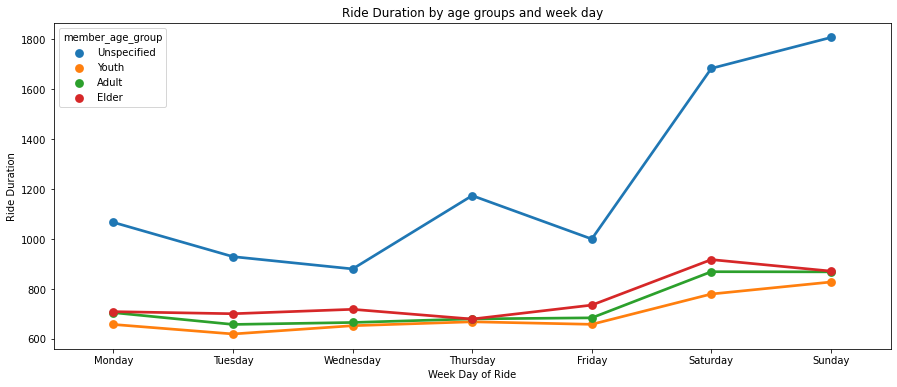

In [58]:
# Visualize relationships between the age group of the riders, the day of ride and the time spent riding    
count_point_plot(ptype = 'point', hor = 'start_day', vert = 'duration_sec', zhue= 'member_age_group', 
             sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
             hor_label ='Week Day of Ride', vert_label ='Ride Duration', title='Ride Duration by age groups and week day')

#### Observations on Research Question 13:



The three main age classes (Youth, Adult, and Elder) follow similar pattern in the time they start their ride and the duration per day. The youth class spend lesser duration riding than the adults and elders. However, on Thursday the three main classes tend to ride at same pace.

Saturdays and Sundays witnessed more ride time. It may be recalled that in research question 9, there were significantly lesser riders on Saturdays and Sundays. Thus, with lesser demands for bikes, there is more time available for those that come for it.

Finally, it is worth noting that a category of individual that did not specify their date of birth are represented in the chart. Thier path on the chart is much like the ride pattern of others. Particulary, it maps much like the adult (green) line path! Could the unspecified age group be dominated by individuals in the adult age group? More exploration may be need to confirm.

#### Research Question 14:
What are the relationships between the time each gender started riding and the time spent?


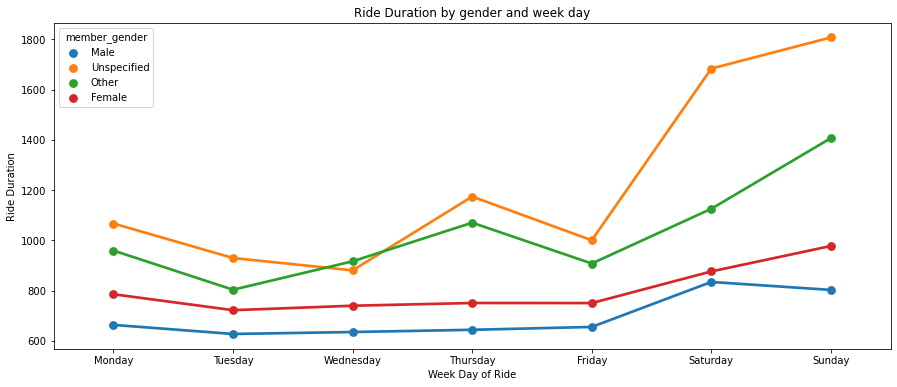

In [59]:
# Visualize relationships between the gender of the riders, the day of ride and the time spent riding
count_point_plot(ptype = 'point', hor = 'start_day', vert = 'duration_sec', zhue= 'member_gender', 
             sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
             hor_label ='Week Day of Ride', vert_label ='Ride Duration', title='Ride Duration by gender and week day')

#### Observations on Research Question 14:
The male gender rode fastest! The female gender was significantly slower than their main counterparts, but faster than the unclassified gender and those who indicated "other".

The male and female genders have very similar riding pattern, except on Sundays where there is a drop on the riding time by males.

#### Research Question 15:
What are the relationships between the time each membership grade started riding and the time spent?

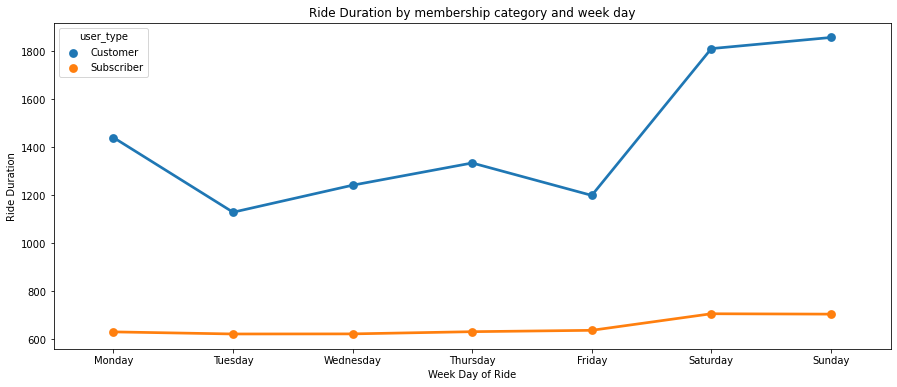

In [60]:
# Visualize relationships between the membership status of the riders, the day of ride and the time spent riding
count_point_plot(ptype = 'point', hor = 'start_day', vert = 'duration_sec', zhue= 'user_type', 
             sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
             hor_label ='Week Day of Ride', vert_label ='Ride Duration', title='Ride Duration by membership category and week day')

#### Observations on Research Question 15:
What are the relationships between the time each membership grade started riding and the time spent?

Subscribers have a very stable riding pattern. Similar riding time is observed from Monday to Friday and an upward surge on Saturdays and Sundays. From this pattern, we can perceive that subscribers are workers who ride to work on weekdays since there is a regular ride time during this period. They spend more time at weekends, probably for fun rides.

On the other hand, the customers have very irregular ride pattern. While there is high ride duration on Mondays, there is even much higher ride time on Saturdays and Sundays for customers.

#### Research Question 16:
What is the relationship between the gender, membership category and the time spent riding?

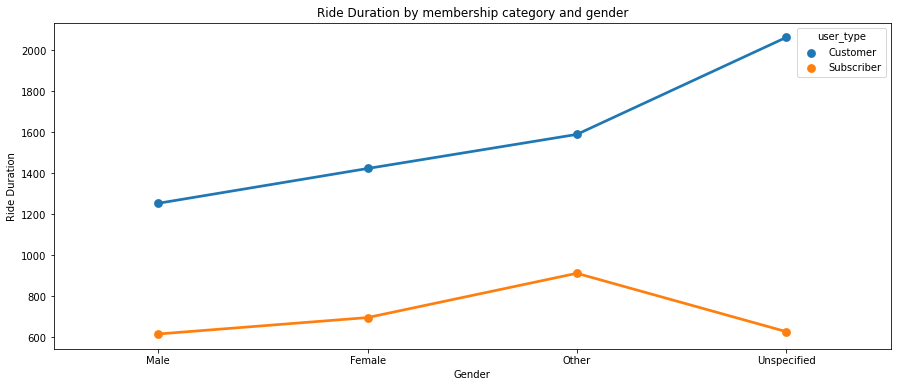

In [61]:
count_point_plot(ptype = 'point', hor = 'member_gender', vert = 'duration_sec', zhue= 'user_type', 
             sort= ['Male', 'Female', 'Other', 'Unspecified'], 
             hor_label ='Gender', vert_label ='Ride Duration', title='Ride Duration by membership category and gender')

#### Observations on Research Question 16:
What is the relationship between the gender, membership category and the time spent riding?

We see from the chart that male customers spend more time riding than male subscribers. While this is similary in other cases, we notice a steep reduction in ride duration of subscribers with unspecified gender; whereas the customers had much more ride time. 

Could it be that the subcribers whose gender were unspecified were actually males? Looking at the duration of ride for the unspecified gender, it seems to be as same level with the males. Future investigations may seek to establish this.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We see from charts that male customers spend more time riding than male subscribers. 
> Subscribers have a very stable riding pattern, whereas customers have very irregular ride pattern. 

> The Youth, Adult, and Elder follow similar pattern in the time they start their ride and the duration per day. The youth class spend lesser duration riding than the adults and elders. However, on Thursday the three main classes tend to ride at same pace.

> Saturdays and Sundays witnessed more ride time, despite the significantly lesser riders on Saturdays and Sundays. Probably there are lesser demands for bikes, resulting in more time available for those that come for it.

> The male gender rode fastest! The female gender was significantly slower than their male counterparts, but faster than the unclassified gender and those indicated as "other".

> The male and female genders have very similar riding duration pattern, except on Sundays where there is a drop on the riding time by males.

### Were there any interesting or surprising interactions between features?

> A very stable riding pattern was observed from Monday to Friday and an upward surge on Saturdays and Sundays. From this pattern, we can perceive that subscribers are workers who ride to work on weekdays since there is a regular ride time during this period. They spend more time at weekends, probably for fun rides.

> Finally, it is worth noting that a category of individual that did not specify their date of birth have a path on the chart much like the ride pattern of others. Could the unspecified age group be dominated by individuals in the adult age group? More exploration may be need to confirm.

## Conclusions
> The Ford GoBike System is a bike-sharing system. The data set includes information about individual rides upto 183412 records and 16 features.

> The dataset was uploaded to Pandas dataframe. Thereafter, visual and programmatic assessment was carried out to identify the quality and tidiness issues. Some of the issues discovered included datatype misrepresentation, missing values, and lack of sufficient columns needed for analysis. All issues observed were cleaned. 

> An outlier was discovered in the member_birth (aged 141years), which was removed to have a cleaner dataset for analysis. 

> During the cleaning process, empty entries for gender was replaced with "Unspecified". This was necessary to ensure it is captured in our analysis to see its pattern and possibly identify the category they could belong. Also, some individuals did not state their dates of birth; this group were captured as "Unspecified". Furthermore, new attributes were created e.g age was calculated from the date of birth supplied from the date the data was gathered (2019). Columns with wrong datatypes were corrected e.g dates were changed from string to datetime datatype.

> Ages of the individuals were categorized into Unspecified (<18), Youth (18- 25), Adult(26 - 59), Elder(>59). The system users were either 'Subscribers' or 'Customers'. 

> Visualizations were plotted to examine the patterns of the data and insights were derived. Some insights are stated hereunder.

>> We see from charts that male customers spend more time riding than male subscribers. 
>> On Thursdays, the three main age groups tend to ride at same duration.
>> Saturdays and Sundays witnessed more ride duration, despite the significantly lesser number of riders on Saturdays and Sundays. Probably there are lesser demands for bikes, resulting in more time available for those needing bikes to come take them.

>> From the pattern in data, we can perceive that subscribers are workers who ride to work on weekdays since there is a regular ride time during this period. They spend more time at weekends, probably for fun rides.

>>It is worth noting that a category of individual that did not specify their date of birth have a path on the chart much like the ride pattern of others. Could the unspecified age group be dominated by individuals in the adult age group? More exploration may be need to confirm.

>> Among the known age groups, riders in the Elder age group spend lesser time riding.  Also, they take a little more time during riding to arrive at their destination. Whereas, the Youth were fastest covering their route!

>> Data indicates that an Adult will likely prefer Thursday to ride.
